### Intro
In this notebook, I try to conquer object detection for use on nba clips. I will try and identify players and the basketball.

First, I learn how to use the existing yolov5 model and cv2. During this process, I learn the limits of using the pretrained model. The basketball in the context of an nba photo or clip may be too small to identify. Additionally, persons who are not players are identified. This seems natural as the model's classification does not distinguish between people or the type of ball being used in a sport. This will require some fine-tuning.

Second, I learn to build a dataset from scratch using the label studio app. I continue to install new libraries and dependencies O_o
In this part, I learn how to annotate data, organize directories, learn about yolo data structures, and configure them with a .yaml file.

Third, I try to figure out the structure/organization of my environment so that I can train/fine-tune my model. Once, successfully trained. I understand that I needed to have more data and be extremely diligent in my label.

Fourth, upon validation, my new model is atrocious :) The Lebron image that I wanted to predict did not classify anything. This makes sense given the lack of appropriately labeled data. I am happy with the outcome however becuase this taught me a lot about the pipeline for developing my own models from scratch.

Conclusion/Takeaways: Moreso than anything, I have learned (the hard way) about the value in both understanding and orgnanizing directories, environments. Additionaly, this is the first assignment done on my laptop afer breaking my conda environment at the beginning of the semester. I also never moved to a separate environment after trying to play around with open-ai's shap-e. I may end up undoing everything and reinstalling in the future because I'm sure I have packages and libraries installed in all sorts of places.

In [1]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install torch torchvision opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 MB 47.0 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for opencv-python: filename=opencv_python-4.10.0.84-cp39-cp39-macosx_10_16_x86_64.whl size=27353025 sha256=7fdc7290b87d8c3d4cd8e49fd47b04bc6a6ffe02ab0485b70c59e3d907ac08f4
  Stored in directory: /Users/qdoyou/Library/Caches/pip/wheels/91/69/81/439a455162c6771a73550219a98310e13204f0a15497bef82b
Successfully built opencv-python
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /Users/qdoyou/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-28 Python-3.9.20 torch-2.2.2 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
# image_path = 'fastbreak.jpg'  # Replace with your image path
# img = cv2.imread(image_path)

[ WARN:0@35.207] global loadsave.cpp:241 findDecoder imread_('fastbreak.jpg'): can't open/read file: check file path/integrity


In [46]:
results = model(img)

In [47]:
print(results)

image 1/1: 810x1440 16 persons, 1 chair
Speed: 2.0ms pre-process, 96.4ms inference, 1.2ms NMS per image at shape (1, 3, 384, 640)


In [48]:
detections = results.xyxy[0]  # Get detections in (x1, y1, x2, y2, confidence, class)
print(detections)

tensor([[8.62086e+02, 3.53552e+02, 1.02212e+03, 6.00189e+02, 8.77966e-01, 0.00000e+00],
        [8.07536e+02, 2.00608e+02, 9.83440e+02, 3.95796e+02, 8.56188e-01, 0.00000e+00],
        [7.66834e+02, 8.23979e+01, 8.44103e+02, 2.67065e+02, 8.04788e-01, 0.00000e+00],
        [2.82221e+02, 5.16814e+02, 4.86294e+02, 7.37179e+02, 7.97397e-01, 0.00000e+00],
        [1.92622e+02, 6.58384e+02, 2.77966e+02, 7.33353e+02, 7.38425e-01, 0.00000e+00],
        [1.06481e+02, 6.68155e+02, 1.86870e+02, 7.32696e+02, 6.56258e-01, 0.00000e+00],
        [5.52860e+02, 1.34956e+02, 6.48491e+02, 3.10204e+02, 5.87495e-01, 0.00000e+00],
        [6.47987e-01, 6.44586e+02, 8.26507e+01, 7.34780e+02, 5.56617e-01, 0.00000e+00],
        [9.44253e+02, 4.91997e+01, 1.02377e+03, 1.87803e+02, 5.52775e-01, 0.00000e+00],
        [4.60484e+02, 2.63870e+02, 6.10999e+02, 4.68583e+02, 4.97735e-01, 0.00000e+00],
        [4.61361e+02, 3.59853e+02, 6.22900e+02, 5.61280e+02, 4.71976e-01, 0.00000e+00],
        [1.30996e+03, 3.19717e+0

In [8]:
class_names = model.names  # Get class names
# print(class_names)

basketball_class_id = 32 #class_names.index('sports ball')  # Sports ball for basketball
person_class_id = 0 #class_names['person']

In [50]:
for det in detections:
    x1, y1, x2, y2, conf, cls = det
    if int(cls) == basketball_class_id:
        label = f'Basketball {conf:.2f}'
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 2)
    elif int(cls) == person_class_id:
        label = f'Player {conf:.2f}'
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
        cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)


In [6]:
matplotlib.use('TkAgg')

/var/folders/b_/yjzd4wfs0956kc9zpgb31vb80000gn/T/ipykernel_32476/1800837942.py:1: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed in 3.10.  To suppress this warning, explicitly call plt.close('all') first.
  matplotlib.use('TkAgg')


In [7]:
%matplotlib inline

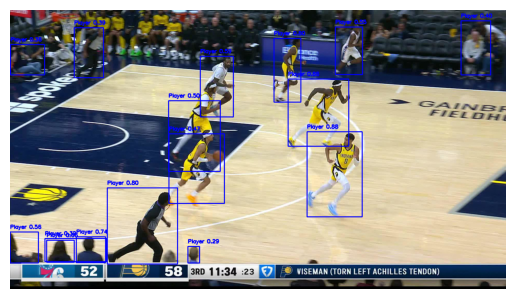

In [54]:
# Convert BGR to RGB for Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# print(img_rgb)
# # Display the image using Matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.show()

In [4]:
import os

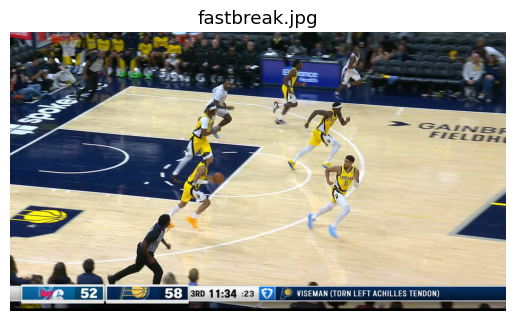

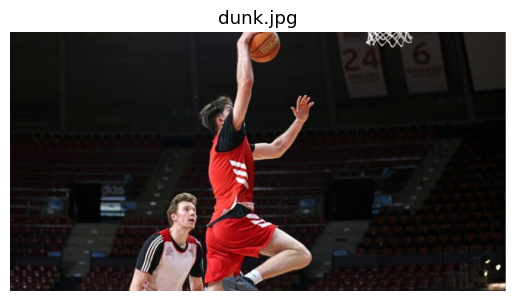

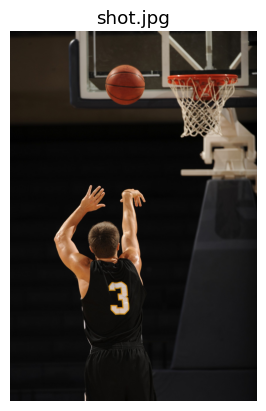

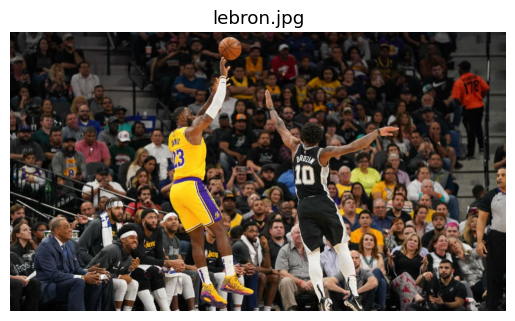

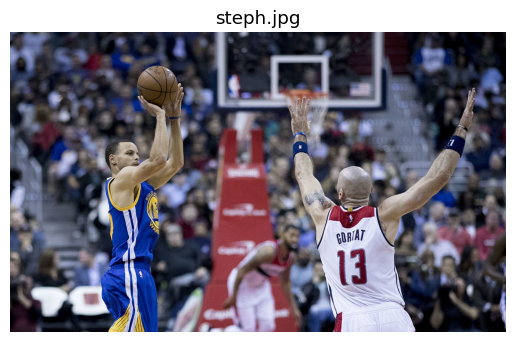

In [42]:
image_dir = 'player ball_test'  # Replace with your directory path

# Loop through each image in the directory
for image_file in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_file)
    img = cv2.imread(image_path)

    # Perform inference
    results = model(img)

    # Parse results
    detections = results.xyxy[0]  # Get detections (x1, y1, x2, y2, confidence, class)

    # Define class names
    class_names = model.names  
    basketball_class_id = 32  # Adjust as per your dataset
    person_class_id = 0        # Adjust as per your dataset

    # Process detections and draw bounding boxes
    for det in detections:
        x1, y1, x2, y2, conf, cls = det
        if int(cls) == basketball_class_id or int(cls) == person_class_id:
            label = f'{class_names[int(cls)]} {conf:.2f}'
            color = (0, 255, 0) if int(cls) == basketball_class_id else (255, 0, 0)
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
            cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Convert BGR to RGB for Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axis
    plt.title(image_file)  # Show the filename as title
    plt.show()

In [58]:
!pip install label-studio

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.4/82.4 MB 50.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.3/958.3 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 4

In [ ]:
!label-studio

=> Database and media directory: /Users/qdoyou/Library/Application Support/label-studio
=> Static URL is set to: /static/
=> Database and media directory: /Users/qdoyou/Library/Application Support/label-studio
=> Static URL is set to: /static/
Read environment variables from: /Users/qdoyou/Library/Application Support/label-studio/.env
get 'SECRET_KEY' casted as '<class 'str'>' with default ''
Starting new HTTPS connection (1): pypi.org:443
https://pypi.org:443 "GET /pypi/label-studio/json HTTP/1.1" 200 32786
Performing system checks...

/opt/anaconda3/envs/shap-e/lib/python3.9/site-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_provider_connection_create" in AllPermissions has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/opt/anaconda3/envs/shap-e/lib/python3.9/site-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_provider_connecti

At this point, I would like to train/fine-tune this model so that smaller views of basketballs might be detected. In order to do this, I will be creating my own dataset using label studio. This will let me draw bounding boxes around key areas of frames from nba clips. After doing this, I will create a .yaml file to communicate my data's configuration. 

In [11]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.62 MiB | 23.90 MiB/s, done.
Resolving deltas: 100% (11695/11695), done.


In [12]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
!cd yolov5

In [22]:
!cd

In [26]:
! python yolov5/train.py --img 640 --batch 16 --epochs 50 --data data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.9.20 torch-2.2.2 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1

In [21]:
import sys
print(sys.executable)


/opt/anaconda3/envs/shap-e/bin/python


In [30]:
!python yolov5/train.py --img 640 --batch 4 --epochs 20 --data data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.9.20 torch-2.2.2 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.

In [ ]:
python /yolov5val.py --weights runs/train/exp/weights/best.pt --data data.yaml --img 640


In [37]:
!python yolov5/val.py --weights yolov5/runs/train/exp5/weights/best.pt --data data.yaml --img 640


val: data=data.yaml, weights=['yolov5/runs/train/exp5/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.9.20 torch-2.2.2 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /Users/qdoyou/shap-e/yolov5/dataset_annotated/labels/val.cache... 
                 Class     Images  Instances          P          R      mAP50   
                   all         16         20    0.00145      0.562    0.00889    0.00317
                person         16          4    0.00108          1     0.0164    0.00579
         ‘sports’ ball         16         16    0.00181      0.125    0.00138   0.000548
Speed: 1.5ms pre-process, 109.0ms inference, 3.7ms NMS pe

In [33]:
!ls runs/train/

ls: runs/train/: No such file or directory


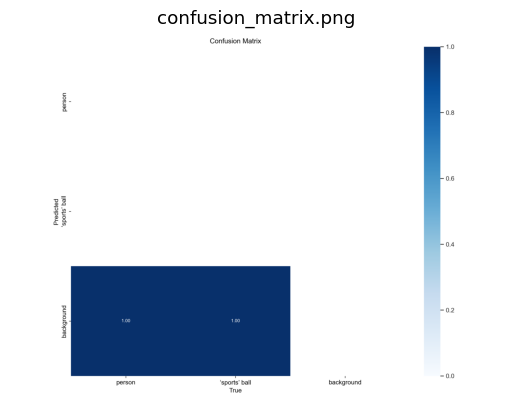

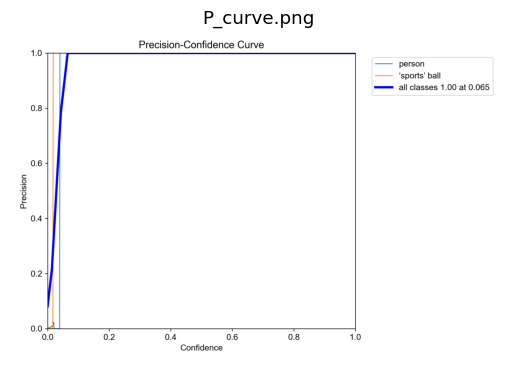

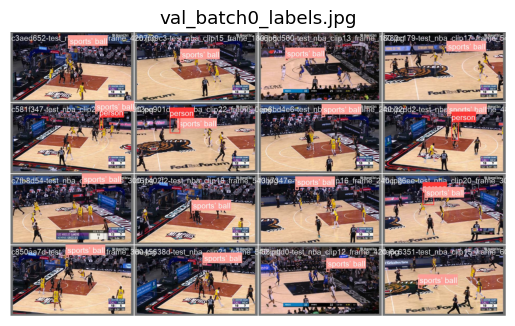

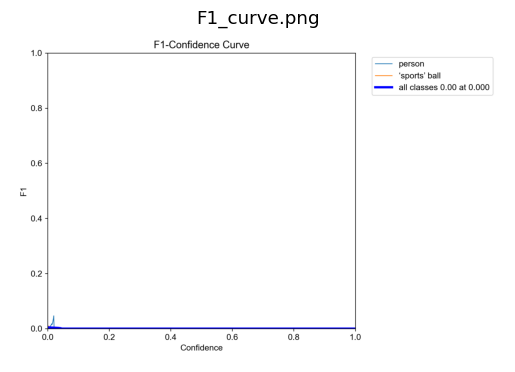

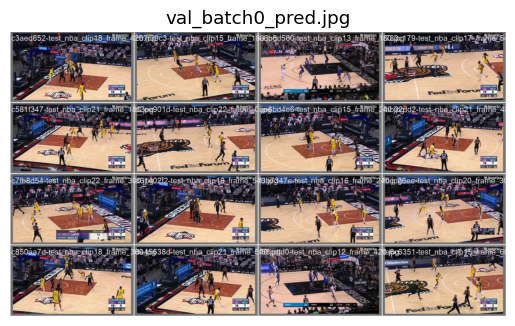

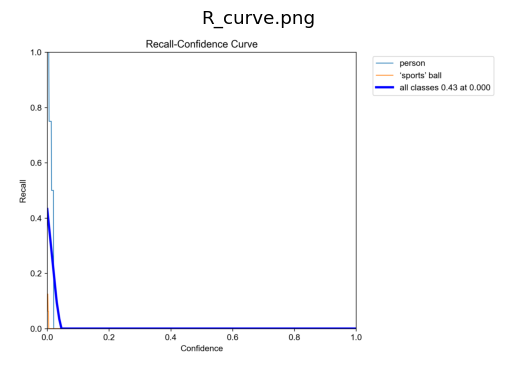

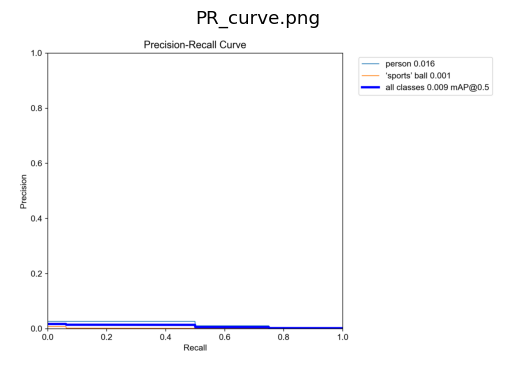

In [39]:
pred_dir = 'yolov5/runs/val/exp3/'

# List all the images in the predictions directory
pred_images = [f for f in os.listdir(pred_dir) if f.endswith(('.jpg', '.png'))]

# Loop through each predicted image and display it
for image_file in pred_images:
    # Load the image
    img_path = os.path.join(pred_dir, image_file)
    img = cv2.imread(img_path)

    # Convert from BGR to RGB (OpenCV loads images in BGR format)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axis
    plt.title(image_file)  # Show the filename as title
    plt.show()

In [40]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp5/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/qdoyou/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-10-28 Python-3.9.20 torch-2.2.2 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


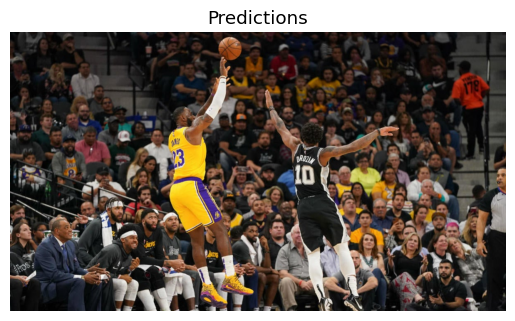

In [41]:
import cv2
import matplotlib.pyplot as plt

# Load an image (replace 'path/to/your/image.jpg' with your actual image path)
image_path = 'player ball_test/lebron.jpg'
img = cv2.imread(image_path)

# Perform inference
results = model(img)

# Parse results
detections = results.xyxy[0]  # Get detections (x1, y1, x2, y2, confidence, class)

# Define class names
class_names = model.names  

# Process detections and draw bounding boxes
for det in detections:
    x1, y1, x2, y2, conf, cls = det
    label = f'{class_names[int(cls)]} {conf:.2f}'
    color = (0, 255, 0) if int(cls) == 0 else (255, 0, 0)  # Example colors for different classes
    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
    cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Convert BGR to RGB for Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.title('Predictions')  # Show title
plt.show()


So it seems my fine tuning did not work for this specific image. what about another one that is of a similar nature to the new training.